In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fp = "/content/Salary_Data.csv"
df = pd.read_csv(fp)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
x = df['YearsExperience']
y = df['Salary']

In [ ]:
x = np.array(x)
y = np.array(y)
print(x)
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


ML Approach

In [ ]:
X = df['YearsExperience'].values
Y = df['Salary'].values

m = 0
c = 0

L = 0.01
epochs = 1000

n = float(len(x))

for i in range(epochs):
  Y_pred = m*X + c
  D_m = (-2/n) * sum(X*(Y - Y_pred))
  D_c = (-2/n) * sum(Y - Y_pred)
  m = m - L * D_m
  c = c - L * D_c

mse_test = sum((Y - Y_pred) ** 2) / len(Y)
print(m,c,mse_test)

9501.013219578916 25448.181745946968 31296754.38648182


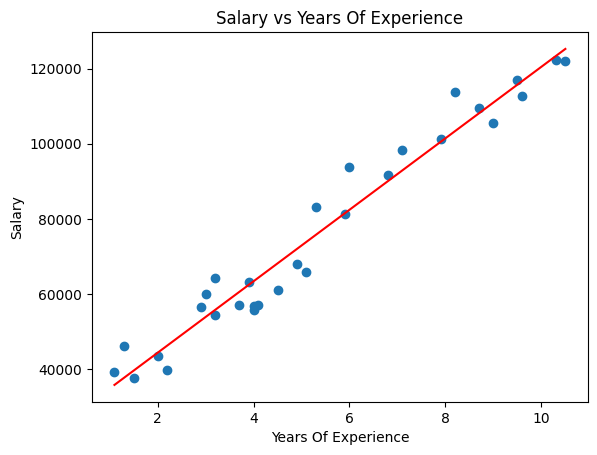

In [ ]:
#Making predictions
#Calculates the predicted salaries using the learned values of m and c.
Y_pred = m*X + c
plt.scatter(X, Y)
#regression line
plt.plot([min(X), max(X)] , [min(Y_pred), max(Y_pred)], color='red')
plt.title('Salary vs Years Of Experience')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Statistical Approach


In [ ]:
def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)

  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  numerator = np.sum(y*x) - n*m_y*m_x
  denominator = np.sum(x*x) - n*m_x*m_x

  # calculating regression coefficients
  m = numerator / denominator
  c = m_y - m*m_x
  print(m,c)

  return (c, m)

In [ ]:
def plot_regression_line(x, y, w):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",
    marker = "o", s = 30)

  # predicted response vector
  y_pred = w[0] + w[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = "g")

  # putting labels
  plt.title('Salary vs Years of Experience')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')

In [ ]:
w = estimate_coef(x, y)
print("Slope: ", w[1],"\nIntercept: ",w[0])

Slope:  9449.962321455072 
Intercept:  25792.200198668717


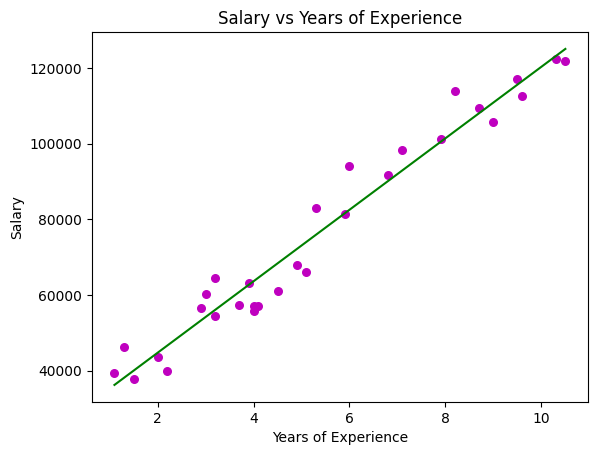

In [ ]:
plot_regression_line(x,y,w)

In [ ]:
def predict(x):
  y_hat = w[0] + w[1]*x
  return y_hat

In [ ]:
q = 10
p = predict(q)
print("Predicted salary: ", p, " for years of experience: ", q)

Predicted salary:  120291.82341321945  for years of experience:  10


Using Scikit-Learn Module

m: nan
c: nan
mse: 51726586.16681818
R-squared: 0.9381853544796769


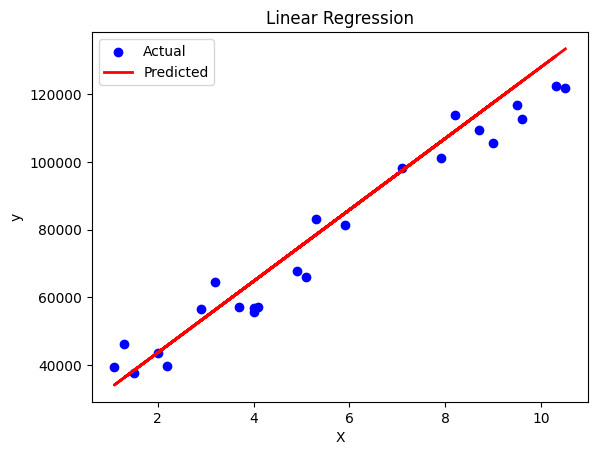

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df2 = pd.read_csv(fp)
X = df2[['YearsExperience']]
y = df2['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"m: {m}")
print(f"c: {c}")
print(f"mse: {mse}")
print(f"R-squared: {r2}")

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

nan
nan
nan


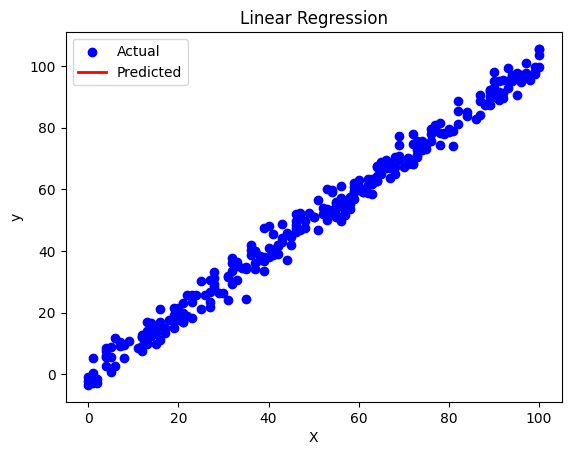

In [ ]:
# Load training and testing data
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Extract features and target variable for training
X_train = train_df['x'].values
Y_train = train_df['y'].values

# Initialize parameters
m = 0  # Slope
c = 0  # Intercept
L = 0.001  # Learning rate
epochs = 1000  # Number of iterations

n = float(len(X_train))  # Number of data points

# Perform Gradient Descent on Training Data
for i in range(epochs):
    Y_pred = m * X_train + c
    D_m = (-2/n) * sum(X_train * (Y_train - Y_pred))
    D_c = (-2/n) * sum(Y_train - Y_pred)
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c

# Test the trained model on test data
X_test = test_df['x'].values
Y_test = test_df['y'].values
Y_pred_test = m * X_test + c

# Calculate Mean Squared Error for test data
mse_test = sum((Y_test - Y_pred_test) ** 2) / len(Y_test)

# Output trained parameters and test error
print(m)
print(c)
print(mse_test)

plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, Y_pred_test, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()